# Italian Bakery Online Sales Analysis

Google Slides presentation of this project can be seen here:\
https://docs.google.com/presentation/d/1lrHFZ34VO21SjiYNDjTgMt8JUiKpZ4eAX3MAk-c8FGc/edit?usp=sharing

### OBJECTIVE:

In November, 2022, an Italian bakery introduced a new, fancier box to package cannoli for customers. The objective of this project is to create a visualization that will allow the bakery owners to see how sales of cannoli have changed (if at all) after the introduction of this new packaging. The visualization will be a dual-axis line graph that compares total monthly sales (left axis) to monthly sales of cannoli, specifically (right axis).

### DATA SOURCES:
   * Data source is a .csv file exported from the Italian Bakery's Shopify store
   
### STEPS:

   * [1. Import Data](#1)
   * [2. Isolate Cannoli Data](#2)
   * [3. Make the Plot](#3)

### 1. IMPORT DATA <a class="anchor" id="1"></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Import data
sales = pd.read_csv('sales_2020-04-01_2023-05-01.csv', usecols=['Date', 'Product', 'Net sales', 'Sales channel'])
sales = sales.rename(columns={'Net sales':'Sales'})

# Remove timezones from dates, then convert to datetime
sales['Date'] = [i[0:10] for i in sales['Date']]
sales['Date'] = pd.to_datetime(sales['Date'])

# Remove sales that are not "Online Store" (the bakery experimented with Shopify POS or 3 months, causing a spike in sales)
sales = sales[sales['Sales channel'] == 'Online Store']

sales.head()

,Date,Sales channel,Product,Sales
0,2020-04-14,Online Store,Conchiglie Rigate,3.51
1,2020-04-14,Online Store,Chocolate Cannoli,0.45
2,2020-04-14,Online Store,Vanilla Cannoli,0.61
3,2020-04-14,Online Store,Gluten-Free - Penne Rigate,0.63
4,2020-04-18,Online Store,Square Dried Whole Wheat Bread - 400g,3.99


### 2. ISOLATE CANNOLI DATA <a class="anchor" id="2"></a>

In [2]:
# Make new column "Cannoli Sales"
cannoli_mask = sales['Product'].str.match(r'(?i)^((.|\n)*)cannoli((.|\n)*)$', na=False)
sales.loc[:,'Cannoli Sales'] = 0
sales.loc[cannoli_mask,'Cannoli Sales'] = sales['Sales']

# Drop 'Product" column
sales = sales.drop(['Product', 'Sales channel'], axis=1)

# Make arrays of dates to group and label data
# (bins start at June 2020, because that is when brick-and-mortar sales resumed, after covid closure)
bins = pd.date_range(start='2020-07-01', end='2023-05-01', freq='M') + pd.offsets.Day(1)
labels = bins.strftime('%b %Y')
labels = labels[:len(labels)-1]

# Group data into bins, by month
sales = sales.groupby([pd.cut(sales['Date'], bins=bins, labels=labels)]).agg({'Sales' : sum, 'Cannoli Sales' : sum}).reset_index()

sales.head()

,Date,Sales,Cannoli Sales
0,Aug 2020,22146.22,1388.50
1,Sep 2020,20073.92,1039.00
2,Oct 2020,24186.98,1031.33
3,Nov 2020,23369.68,1010.50
4,Dec 2020,61151.69,3424.57


### 3. MAKE THE PLOT <a class="anchor" id="3"></a>

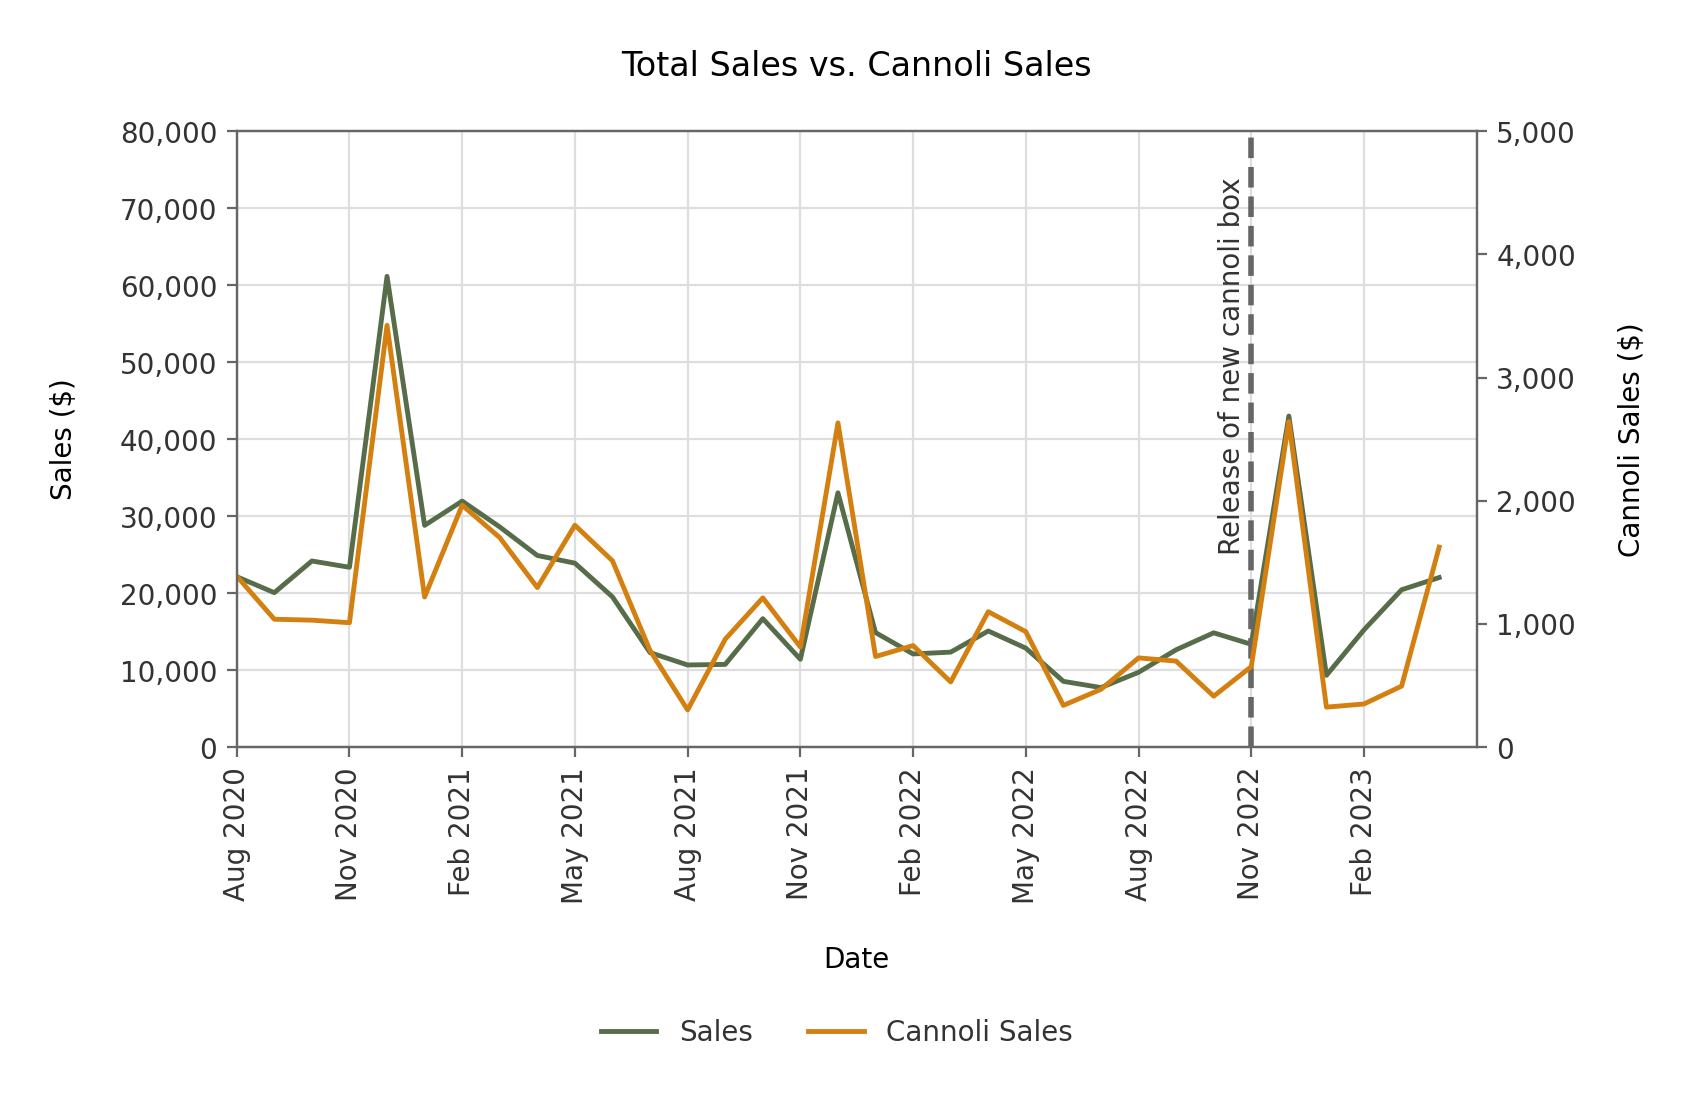

In [3]:
# Create the plot
plt.style.use('italian_bakery.mplstyle')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot data
ax1.plot(sales['Date'], sales['Sales'], label='Sales', color='#576D4A')
ax2.plot(sales['Date'], sales['Cannoli Sales'], label='Cannoli Sales', color='#D48011')

# Set axes ticks and labels
plt.xlim([0, len(sales['Date'])])
ax1.set_xticks(sales['Date'][0::3])
ax1.set_xticklabels(sales['Date'][0::3], rotation=90)
ax1.set_ylim([0,80000])
ax1.set_xticks(sales['Date'][0::3])
ax2.set_ylim([0,5000])
ax2.grid(None)

# Add annotation
ax1.axvline(x='Nov 2022', linestyle='--', color='#666', linewidth='2')
plt.text(26.85, 4625, 'Release of new cannoli box', rotation=90, color='#333',
         horizontalalignment='right', verticalalignment='top')

# Add commas to y-axis labels
ax1.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add title and labels
ax1.set_title('Total Sales vs. Cannoli Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales ($)')
ax2.set_ylabel('Cannoli Sales ($)')
fig.legend(bbox_to_anchor=(0.5, -0.195), ncol=2, loc='upper center')

fig.savefig('italian_bakery.png')

plt.show()